In [92]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

SMALL_SIZE = 14
MEDIUS_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUS_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

gammar = 5596.880474356758
betar  = 0.9999999840383441
frev   = 11245.
circum = 26658.883
c = 3e8

In [93]:
def _Gauss(x, x0, a, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def GaussianFit(x, y):
	mean = sum(x * y) / sum(y)
	sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
	amplitude = max(y)
	popt, pcov = curve_fit(_Gauss, x, y, p0 = [mean, amplitude, sigma])
	amplitude_norm = (popt[1] * np.sqrt(2 * np.pi)
                          / (x[1]-x[0]) * popt[2] / float(sum(y)))
	# print amplitude_norm
	return popt, amplitude_norm

In [97]:
df_initial = pd.read_parquet('output/initial_profile.parquet', engine='pyarrow')
poptt_ini, convt = GaussianFit(df_initial['bin_centers'], df_initial['bin_counts'])

df_final = pd.read_parquet('output/final_profile.parquet', engine='pyarrow')
poptt_fin, convt = GaussianFit(df_final['bin_centers'], df_final['bin_counts'])

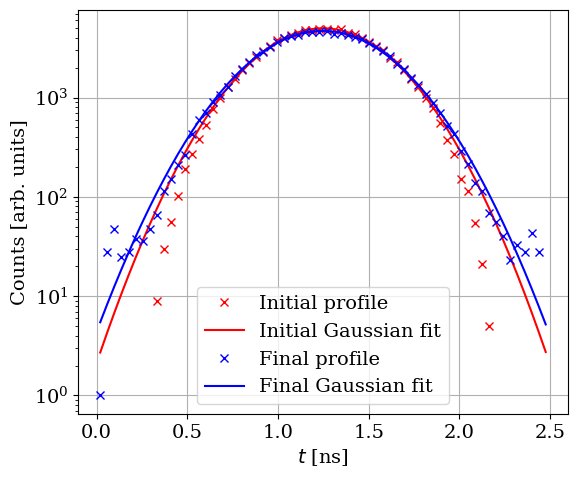

In [102]:
f, ax = plt.subplots(1, figsize=(6, 5))

ax.plot(df_initial['bin_centers'] * 1e9, df_initial['bin_counts'], marker = 'x', ls = '', color = 'r', 
        label = 'Initial profile')
ax.plot(df_initial['bin_centers'] * 1e9, _Gauss(df_initial['bin_centers'], *poptt_ini), color = 'r', 
        label = 'Initial Gaussian fit')

ax.plot(df_final['bin_centers'] * 1e9, df_final['bin_counts'], marker = 'x', ls = '', color = 'b', 
        label = 'Final profile')
ax.plot(df_final['bin_centers'] * 1e9, _Gauss(df_final['bin_centers'], *poptt_fin), color = 'b', 
        label = 'Final Gaussian fit')

ax.grid()
ax.legend()
ax.set_yscale('log')

ax.set_xlabel('$t$ [ns]')
ax.set_ylabel('Counts [arb. units]')

f.tight_layout()
f.savefig('figures/profiles.png')

In [77]:
26670 / 35600. / c

2.4971910112359554e-09

In [15]:
df_initial

,bin_centers,bin_counts
0,1.949281e-11,0.0
1,5.847844e-11,0.0
2,9.746407e-11,0.0
3,1.364497e-10,0.0
4,1.754353e-10,0.0
...,...,...
59,2.319645e-09,0.0
60,2.358630e-09,0.0
61,2.397616e-09,0.0
62,2.436602e-09,0.0


IndexError: index 0 is out of bounds for axis 0 with size 0

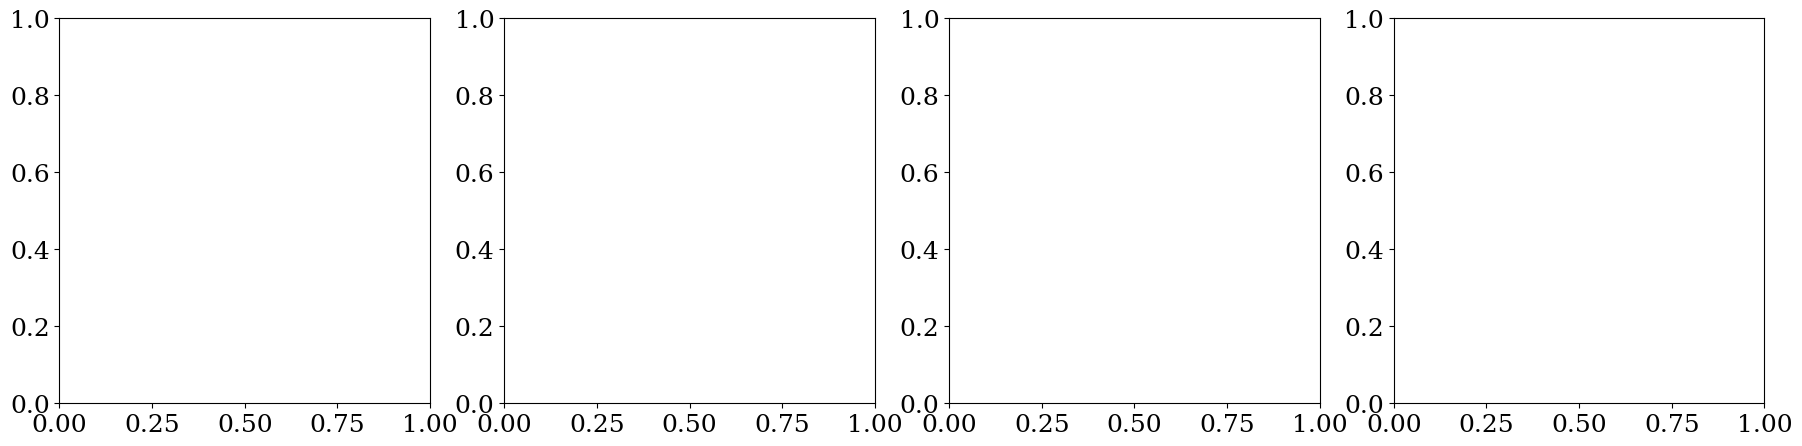

In [9]:
df_python = pd.read_parquet('output/IBS_output_python_gaussian2.parquet', engine='pyarrow')
df_blond  = pd.read_parquet('output/IBS_output_BLonD_guassian2.parquet', engine='pyarrow')#[:350]

f, ax = plt.subplots(1, 4, figsize=(22,5))

index = -1
index = np.where(df_blond['epsn_x'] == 0)[0][0]

ax[0].plot(df_python['time'][:index] * frev, df_python['epsn_x'][:index], label = 'Analytic')
ax[0].plot(df_blond['time'][:index] * frev, df_blond['epsn_x'][:index], ls = '--', label = 'BLonD')

ax[1].plot(df_python['time'][:index] * frev, df_python['epsn_y'][:index], label = 'Analytic')
ax[1].plot(df_blond['time'][:index] * frev, df_blond['epsn_y'][:index], ls = '--', label = 'BLonD')

ax[2].plot(df_python['time'][:index] * frev, df_python['deltaE'][:index], label = 'Analytic')
ax[2].plot(df_blond['time'][:index] * frev,  df_blond['deltaE'][:index], label = 'BLonD', zorder = 1)

ax[3].plot(df_python['time'][:index] * frev, df_python['tau_ns'][:index] * 1e12, label = 'Analytic')
ax[3].plot(df_blond['time'][:index] * frev,  df_blond['tau_ns'][:index] * 1e12, label = 'BLonD', zorder = 1)
ax[3].plot(df_blond['time'][:index] * frev,  df_blond['tau_ns2'][:index] * 1e12, label = 'BLonD2', zorder = 1)

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('Turns')

ax[0].set_ylabel(r'$\varepsilon^N_x$ [m]')
ax[1].set_ylabel(r'$\varepsilon^N_y$ [m]')
ax[2].set_ylabel(r'$\sigma_\delta$')
ax[3].set_ylabel(r'$\tau_{4\sigma}$ [ps]')

f.tight_layout()


f1, ax = plt.subplots(1, figsize=(5,4))

ax.plot(df_python['time'][:index] * frev, df_python['deltaE'][:index] * 450e9 * df_python['tau_ns'][:index], label = 'Analytic')
ax.plot(df_blond['time'][:index] * frev,  df_blond['deltaE'][:index] * 450e9 * df_blond['tau_ns'][:index], label = 'BLonD', zorder = 1)

ax.grid()
ax.legend()
ax.set_xlabel('Turns')
ax.set_ylabel(r'$\varepsilon_z$ [eVs]')
f1.tight_layout()




# plt.savefig('figures/emittance_evolution_gaussian.png')